# Hydra Multi-Asset Verification Test
## Composite Action Tests
For comparison, identical transactions in the modeled Hydra system are duplicated in modeled Uniswap instances of reserve token R_x paired with pooled Hydra Q.

## Swap Asset i for Asset j in Omnipool
## Swap Asset j for Asset i in Omnipool

exo_trade = ['test_q_for_r'] # agent 0

exo_liq = ['test_remove'] # agent 3

exo_asset = ['alternating']

exo_composite = ['alternating'] 

# UNSIWAP Comparison for Swap Assets would require a third modeled Uniswap instance (i-j) pair
# Will Implement if desired, but unclear if this is a diminishing returns case

## Introduction to Uniswap
>Uniswap is an automated market maker for exchanging ERC20 tokens. Anyone can become a liquidity provider, and invest in the liquidity pool of an ERC20 token. This allows other users to trade that token for other tokens at an exchange rate based on their relative availibility. When a token trade is executed, a small fee is paid to the liquidity providers that enabled the transaction.
https://uniswap.io/

There are basically eight ways (_mechanisms_) in which an agent can interact with an instance of Uniswap (https://github.com/Uniswap/uniswap-v1/blob/master/contracts/uniswap_exchange.vy):
1. `addLiquidity`: deposit ETH and tokens in the liquidity pool; mint UNI tokens - "shares" of that Uniswap instance - in exchange;
1. `removeLiquidity`: burn UNI tokens; withdraw a proportional amount of ETH and tokens in exchange;
1. `ethToTokenInput`: user specifies an exact amount of ETH they send; receives corresponding amount of tokens
1. `ethToTokenOutput`: user sends some ETH and specifies an exact amount of tokens they want to buy; Uniswap refunds ETH sent in excess
1. `tokenToEthInput`: user specifies an exact amount of tokens they send; receives corresponding amount of ETH
1. `tokenToEthOutput`: user specifies an exact amount of ETH they want to buy; Uniswap takes the corresponding amount of tokens from the user account
1. `tokenToTokenInput`: user specifies an exact amount of "token A" they send; receives corresponding amount of "token B" (effectively a `tokenToEthInput` in instance A combined with a `ethToTokenInput` in instance B)
1. `tokenToTokenOutput`: user specifies an exact amount of "token B˜ they want to buy; Uniswap takes the corresponding amount of "token A" from the user account (effectively a `ethToTokenOutput` in instance B combined with a `tokenToEthOutput` in instance A)

## Limitations and simplifications of this model
* When triggering mechanisms, Uniswap users may include conditions they would like to apply to the transaction. For example, they could define a minimum amount of UNI tokens they wish to receive as a result of adding liquidity to the pool; or the maximum number of tokens they are willing to pay for the amount of ETH requested in a `tokenToEthOutput` operation; or a deadline after which the transaction should not be processed. **This simplified model does not account for this kind conditioning.**

* The `ethToTokenOutput`, `tokenToEthOutput` mechanisms are not implemented. **All swaps are treated as of the "input defined" type.**

* The `tokenToToken` mechanism are not implemented, as they are merely a `tokenToEth` in the context of a single Uniswap instance.

* **User _behavior_ has not been modeled**. User _actions_ are derived from the history of events of the Uniswap instance being analyzed.

## Model File structure
* Test Notebooks .ipynb
* model

In the model folder there exist 4 files and a parts folder, the [config.py](model/config.py), [partial_state_update_block.py](model/partial_state_update_block.py), [run.py](model/run.py), and [state_variables.py](state_variables.py). The [config.py](model/config.py) contains the simulation configurations, aggregating the partial states, and the state variables. The [partial_state_update_block.py](model/partial_state_update_block.py) contains the partial state update blocks and how they update the state variables. [state_variables.py](state_variables.py) defines the state variables and [run.py](model/run.py) actually runs the simulation. [plot_utils.py](model/plot_utils.py) contain the plotting functions used to generate the analysis.

The components of the model live within the parts subfolder as:

* [action.py](model/parts/action.py) 
    * Action dictionary drives the model. Currently, actions are prescribed actions in testing mode. However, action schema respects https://www.kaggle.com/markusbkoch/uniswap-ethdai-exchange as much as possible, allowing for future analysis against uniswap transaction datasets.  

* [uniswap.py](model/parts/uniswap.py)
    * Reads in action output and directs the action to the appropriate Uniswap mechanism for each corresponding Uniswap instance (currently R_i<>Q pair and R_j<>Q pair) and its requisite state variable: UNI_Qx, UNI_Rx, and UNI_Sx.

    * [utils.py](model/parts/utils.py) 
        * Computes the state update for each Uniswap state variable
        
    * [agent_utils.py](model/parts/agent_utils.py) 
        * Computes the corresponding agent local state for each Uniswap agent resolving their action

* [hydra.py](model/parts/hydra.py)
    * Reads in action output and directs the action to the appropriate Hydra mechanism for each state variable: Q, Sq, and pool.
    
    * [hydra_utils.py](model/parts/hydra_utils.py) 
        * Computes the state update for each Hydra state variable

    * [asset_utils.py](model/parts/asset_utils.py) 
        * Computes the state update for each Reserve Asset in a Hydra Omnipool

    * [hydra_agent_utils_class.py](model/parts/hydra_agent_utils_class.py) 
        * Computes the corresponding agent local state for each Hydra agent resolving their action
        
The initial parameters and hyperparameters of the system are defined in [sys_params.py](model/sys_params.py) and helper functions, plots, etc. are in the [utils.py](model/parts/utils.py).


### Model dataset*


## Run Model

In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)
# rdf = df # debugging substeps



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (10, 10, 1, 19)
Execution Method: local_simulations
SimIDs   : [0]
SubsetIDs: [0]
Ns       : [0]
ExpIDs   : [0]
Execution Mode: single_threaded
Q Swap
Q 400000000
delta Q 0.0
H Swap
H 400000000
delta Q 0.0
delta_Ri 50
Ri 100000000
Si 1000
delta_Si -0.5
Q Swap
Q 400000000.0
delta Q -200.1001000500491
H Swap
H 400000000.0
delta Q -200.1001000500491
delta_Ri 100
Ri 99999950.0
Si 1000.5
delta_Si -1.0010007505003753
Q Swap
Q 399999799.89989996
delta Q -100.15020030049725
H Swap
H 399999799.89989996
delta Q -100.15020030049725
delta_Ri 50
Ri 99999949.89984988
Si 1000.5000002500001
delta_Si -0.5005003760015648
Q Swap
Q 399999699.74969965
delta Q 0.10019979947983869
H Swap
H 3

## Analysis

For information on how to access and analysis data from the Eth/Dai Uniswap smart contract, visit our sister notebook [here](Uniswap_EthDai_Exchange_Data.ipynb).




In [2]:
model_history = rdf[['UNI_Qi', 'UNI_Ri', 'UNI_Si', 'timestep']]
model_history.columns = ['model_UNI_Qi', 'model_UNI_Ri', 'model_UNI_Si', 'Event']

uniswap_j = rdf[['UNI_Qj', 'UNI_Rj', 'UNI_Sj']]
uniswap_j.columns = ['UNI_Qj', 'UNI_Rj', 'UNI_Sj']

uniswap_ij = rdf[['UNI_ij', 'UNI_ji', 'UNI_Sij']]
uniswap_ij.columns = ['UNI_ij', 'UNI_ji', 'UNI_Sij']

hydra = rdf[['Q', 'H', 'Sq']]
hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

Despite the simplifications, the outputs of the model are very similar to the real data

In [3]:
print(rdf.pool[rdf.first_valid_index()])

<class 'model.parts.asset_utils.Asset'>: {'pool': {'i': {'R': 99999950.0, 'S': 1000.5, 'W': 1000.5, 'P': 2.0010010005005, 'dP': 0.0010010005005001155}, 'j': {'R': 100000050, 'S': 999.5, 'W': 999.5, 'P': 1.9989990005004996, 'dP': -0.001000999499500388}, 'k': {'R': 100000000, 'S': 1000, 'W': 1000, 'P': 2.0, 'dP': 0.0}}}


In [4]:
rdf.pool[rdf.first_valid_index()].pool

{'i': {'R': 99999950.0,
  'S': 1000.5,
  'W': 1000.5,
  'P': 2.0010010005005,
  'dP': 0.0010010005005001155},
 'j': {'R': 100000050,
  'S': 999.5,
  'W': 999.5,
  'P': 1.9989990005004996,
  'dP': -0.001000999499500388},
 'k': {'R': 100000000, 'S': 1000, 'W': 1000, 'P': 2.0, 'dP': 0.0}}

In [5]:
# rdf.pool[rdf.first_valid_index()*10].pool

In [6]:
rdf.pool[rdf.last_valid_index()].pool

{'i': {'R': 100000249.49899936,
  'S': 997.5049949862877,
  'W': 997.5049949862877,
  'P': 1.9950050124550318,
  'dP': -0.001996001526952451},
 'j': {'R': 99999750.49875014,
  'S': 1002.494982523833,
  'W': 1002.494982523833,
  'P': 2.0049949675351693,
  'dP': 0.00200198850506883},
 'k': {'R': 100000000,
  'S': 1000,
  'W': 1000,
  'P': 1.9999999999999998,
  'dP': 0.0}}

In [7]:
rdf.head(5)

UNI_Qi     UNI_Ri  UNI_Si     UNI_Qj     UNI_Rj  UNI_Sj     UNI_ij  \
4   200000000  100000000    1000  200000000  100000000    1000  100000100   
8   200000000  100000000    1000  200000000  100000000    1000  100000051   
12  200000000  100000000    1000  200000000  100000000    1000  100000151   
16  200000000  100000000    1000  200000000  100000000    1000  100000102   
20  200000000  100000000    1000  200000000  100000000    1000  100000202   

      UNI_ji            UNI_Sij  \
4   99999901  10000000000000000   
8   99999951  10000000000000000   
12  99999852  10000000000000000   
16  99999902  10000000000000000   
20  99999803  10000000000000000   

                                           uni_agents  ...            Q  \
4        m   r_i_out   r_i_in          h      q_i ...  ... 400000000.00   
8        m   r_i_out   r_i_in          h      q_i ...  ... 399999799.90   
12       m   r_i_out   r_i_in          h      q_i ...  ... 399999699.75   
16       m   r_i_out   r_i_in          h      q_i ...  ... 399999699.85   
20       m   r_i_out   r_i_in          h      q_i ...  ... 399999499.60   

              H      Wq      Sq  \
4  400000000.00 2000.00 2000.00   
8  399999799.90 2000.00 2000.00   
12 399999699.75 2000.00 2000.00   
16 399999699.85 2000.00 2000.00   
20 399999499.60 2000.00 2000.00   

                                         hydra_agents  simulation  subset  \
4        m   r_i_out   r_i_in          h      q_i ...           0       0   
8        m   r_i_out   r_i_in          h      q_i ...           0       0   
12       m   r_i_out   r_i_in          h      q_i ...           0       0   
16       m   r_i_out   r_i_in          h      q_i ...           0       0   
20       m   r_i_out   r_i_in          h      q_i ...           0       0   

    run substep  timestep  
4     1       4         1  
8     1       4         2  
12    1       4         3  
16    1       4         4  
20    1       4         5  

[5 rows x 24 columns]

In [8]:
rdf.tail(10)

UNI_Qi     UNI_Ri  UNI_Si     UNI_Qj     UNI_Rj  UNI_Sj     UNI_ij  \
4   200000000  100000000    1000  200000000  100000000    1000  100000100   
8   200000000  100000000    1000  200000000  100000000    1000  100000051   
12  200000000  100000000    1000  200000000  100000000    1000  100000151   
16  200000000  100000000    1000  200000000  100000000    1000  100000102   
20  200000000  100000000    1000  200000000  100000000    1000  100000202   
24  200000000  100000000    1000  200000000  100000000    1000  100000153   
28  200000000  100000000    1000  200000000  100000000    1000  100000253   
32  200000000  100000000    1000  200000000  100000000    1000  100000204   
36  200000000  100000000    1000  200000000  100000000    1000  100000304   
40  200000000  100000000    1000  200000000  100000000    1000  100000255   

      UNI_ji            UNI_Sij  \
4   99999901  10000000000000000   
8   99999951  10000000000000000   
12  99999852  10000000000000000   
16  99999902  10000000000000000   
20  99999803  10000000000000000   
24  99999853  10000000000000000   
28  99999754  10000000000000000   
32  99999804  10000000000000000   
36  99999705  10000000000000000   
40  99999755  10000000000000000   

                                           uni_agents  ...            Q  \
4        m   r_i_out   r_i_in          h      q_i ...  ... 400000000.00   
8        m   r_i_out   r_i_in          h      q_i ...  ... 399999799.90   
12       m   r_i_out   r_i_in          h      q_i ...  ... 399999699.75   
16       m   r_i_out   r_i_in          h      q_i ...  ... 399999699.85   
20       m   r_i_out   r_i_in          h      q_i ...  ... 399999499.60   
24       m   r_i_out   r_i_in          h      q_i ...  ... 399999699.40   
28       m   r_i_out   r_i_in          h      q_i ...  ... 399999399.10   
32       m   r_i_out   r_i_in          h      q_i ...  ... 399999798.10   
36       m   r_i_out   r_i_in          h      q_i ...  ... 399999397.80   
40       m   r_i_out   r_i_in          h      q_i ...  ... 399999995.50   

              H      Wq      Sq  \
4  400000000.00 2000.00 2000.00   
8  399999799.90 2000.00 2000.00   
12 399999699.75 2000.00 2000.00   
16 399999699.85 2000.00 2000.00   
20 399999499.60 2000.00 2000.00   
24 399999699.40 2000.00 2000.00   
28 399999399.10 2000.00 2000.00   
32 399999798.10 2000.00 2000.00   
36 399999397.80 2000.00 2000.00   
40 399999995.50 2000.00 2000.00   

                                         hydra_agents  simulation  subset  \
4        m   r_i_out   r_i_in          h      q_i ...           0       0   
8        m   r_i_out   r_i_in          h      q_i ...           0       0   
12       m   r_i_out   r_i_in          h      q_i ...           0       0   
16       m   r_i_out   r_i_in          h      q_i ...           0       0   
20       m   r_i_out   r_i_in          h      q_i ...           0       0   
24       m   r_i_out   r_i_in          h      q_i ...           0       0   
28       m   r_i_out   r_i_in          h      q_i ...           0       0   
32       m   r_i_out   r_i_in          h      q_i ...           0       0   
36       m   r_i_out   r_i_in          h      q_i ...           0       0   
40       m   r_i_out   r_i_in          h      q_i ...           0       0   

    run substep  timestep  
4     1       4         1  
8     1       4         2  
12    1       4         3  
16    1       4         4  
20    1       4         5  
24    1       4         6  
28    1       4         7  
32    1       4         8  
36    1       4         9  
40    1       4        10  

[10 rows x 24 columns]

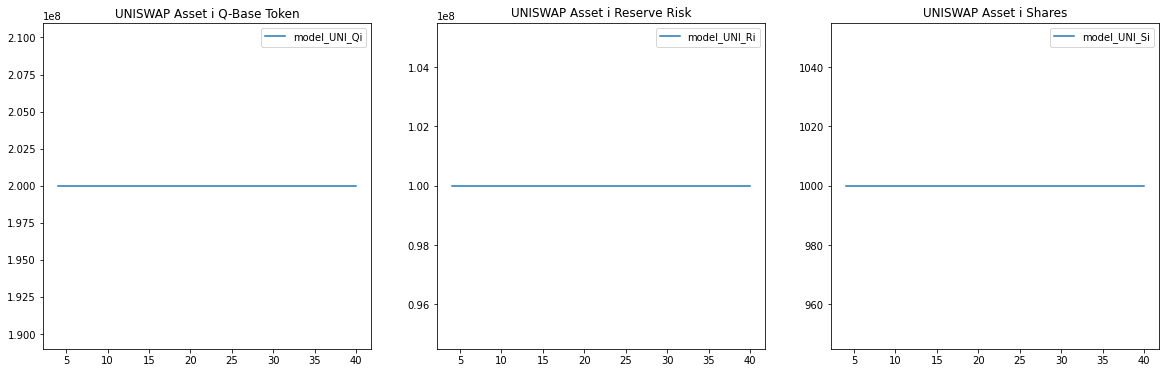

In [9]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Qi'])
plt.title('UNISWAP Asset i Q-Base Token')

ax = plt.subplot(132)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Ri'])
plt.title('UNISWAP Asset i Reserve Risk')

ax = plt.subplot(133)
model_history.astype(float).plot(ax=ax, y=['model_UNI_Si'])
plt.title('UNISWAP Asset i Shares')
plt.show()

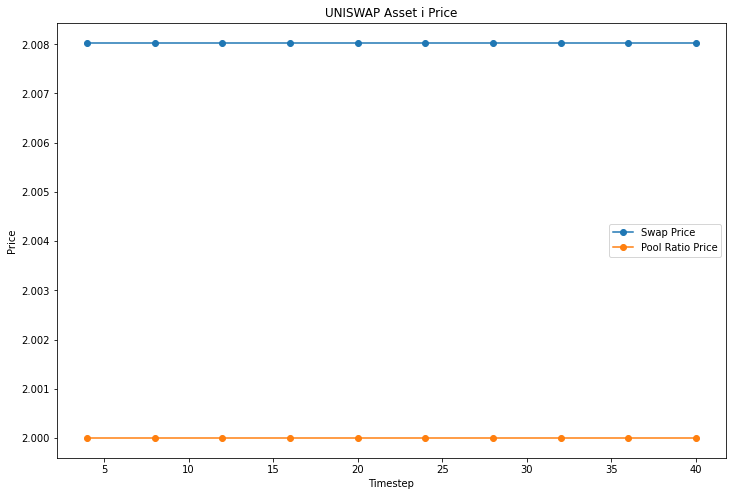

In [10]:
price_plot(rdf,'UNISWAP Asset i Price', 'UNI_P_RQi', 'UNI_Ri', 'UNI_Qi')

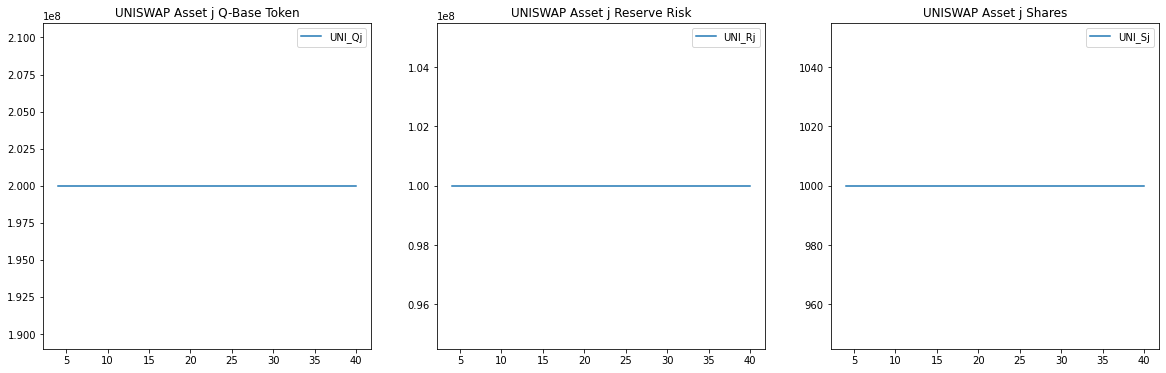

In [11]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Qj'])
plt.title('UNISWAP Asset j Q-Base Token')

ax = plt.subplot(132)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Rj'])
plt.title('UNISWAP Asset j Reserve Risk')

ax = plt.subplot(133)
uniswap_j.astype(float).plot(ax=ax, y=['UNI_Sj'])
plt.title('UNISWAP Asset j Shares')
plt.show()

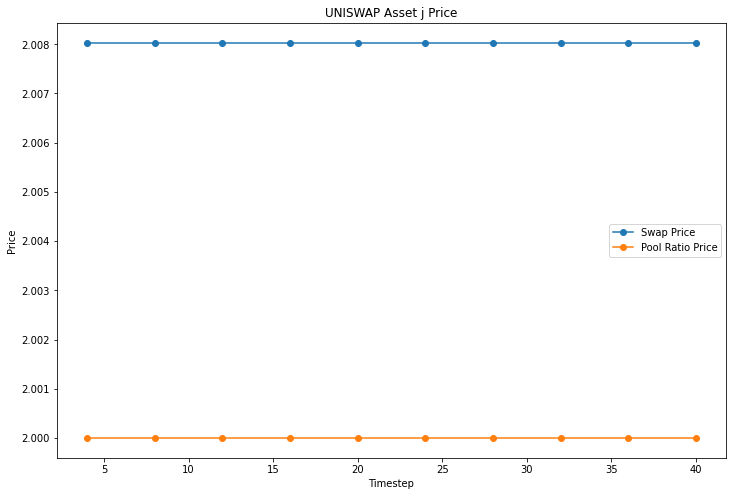

In [12]:
price_plot(rdf,'UNISWAP Asset j Price', 'UNI_P_RQj', 'UNI_Rj', 'UNI_Qj')

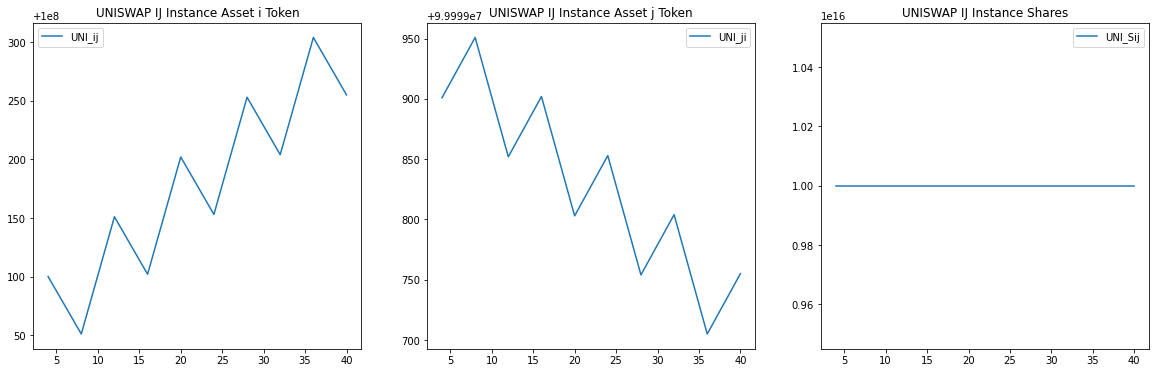

In [13]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_ij'])
plt.title('UNISWAP IJ Instance Asset i Token')

ax = plt.subplot(132)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_ji'])
plt.title('UNISWAP IJ Instance Asset j Token')

ax = plt.subplot(133)
uniswap_ij.astype(float).plot(ax=ax, y=['UNI_Sij'])
plt.title('UNISWAP IJ Instance Shares')
plt.show()

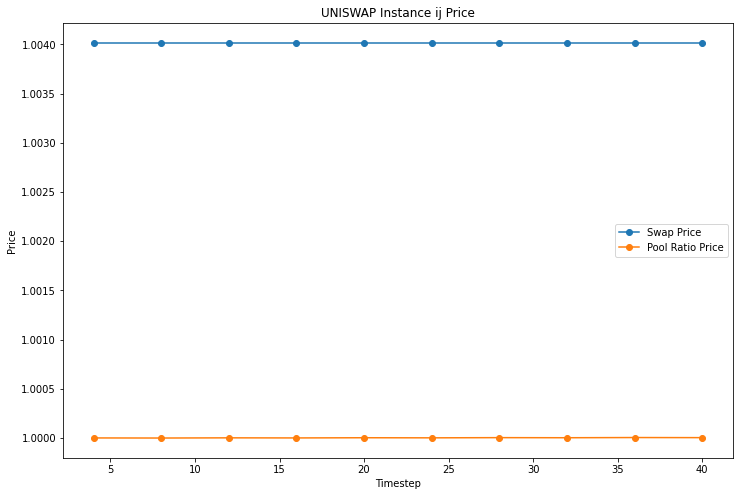

In [14]:
price_plot(rdf,'UNISWAP Instance ij Price', 'UNI_P_ij', 'UNI_ji','UNI_ij' )

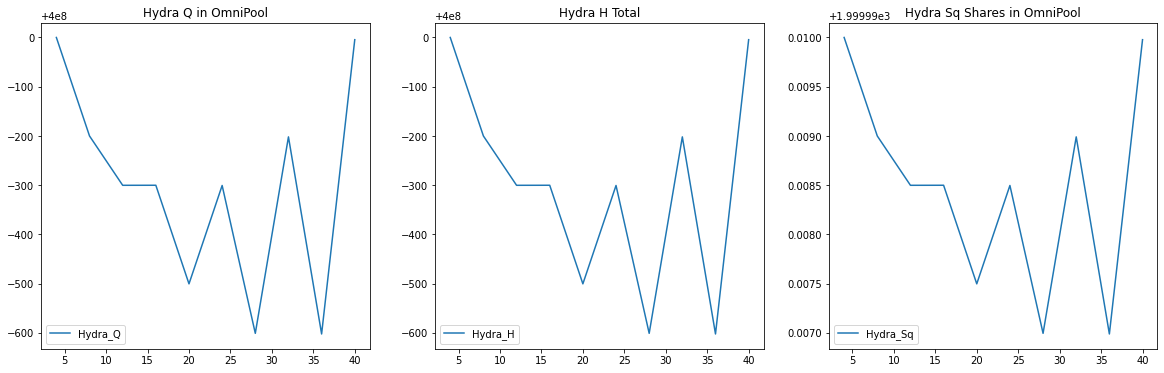

In [15]:
plt.figure(figsize=(20,6))
ax = plt.subplot(131)
hydra.astype(float).plot(ax=ax, y=['Hydra_Q'])
plt.title('Hydra Q in OmniPool')

ax = plt.subplot(132) 
hydra.astype(float).plot(ax=ax, y=['Hydra_H'])
plt.title('Hydra H Total')

ax = plt.subplot(133)
hydra.astype(float).plot(ax=ax, y=['Hydra_Sq'])
plt.title('Hydra Sq Shares in OmniPool')
plt.show()

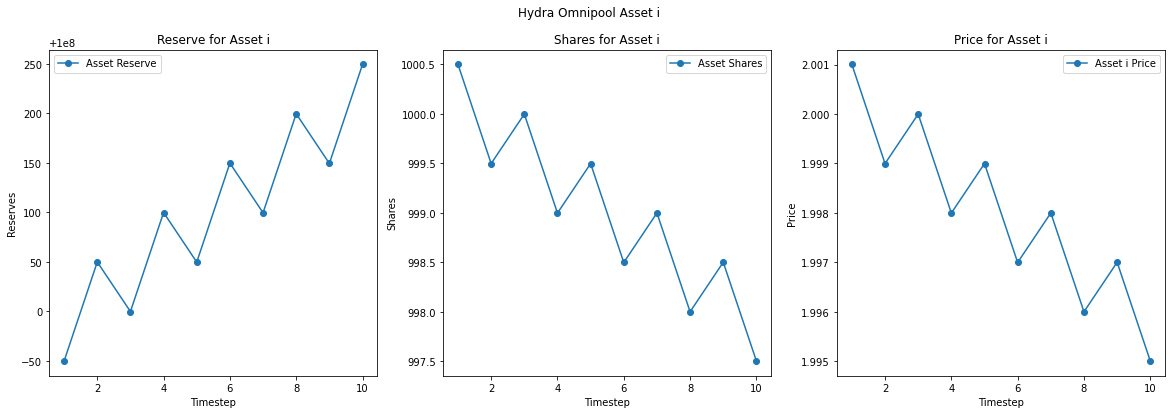

In [16]:
hydra_pool_plot(rdf,'Asset i Reserve and Shares', rdf.last_valid_index(),str('i'))

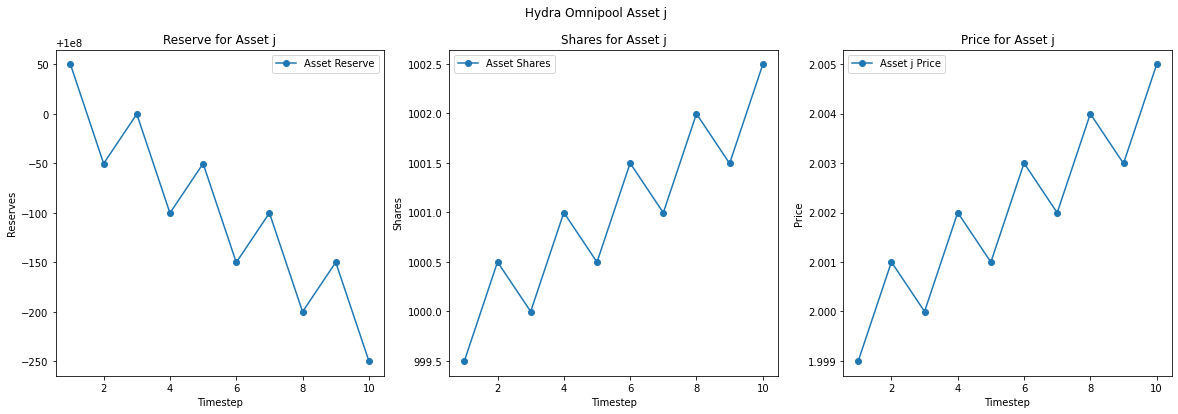

In [17]:
hydra_pool_plot(rdf,'Asset j Reserve and Shares', rdf.last_valid_index(),str('j'))

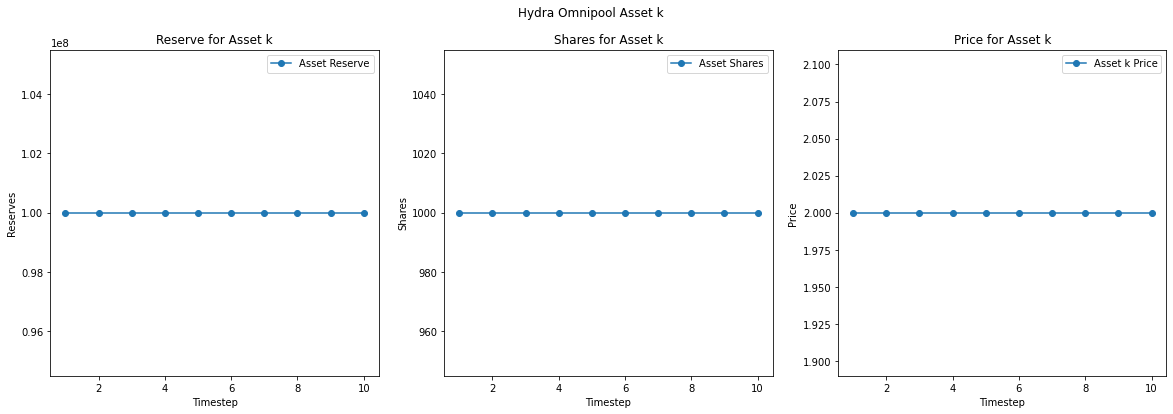

In [18]:
hydra_pool_plot(rdf,'Asset j Reserve and Shares', rdf.last_valid_index(),str('k'))

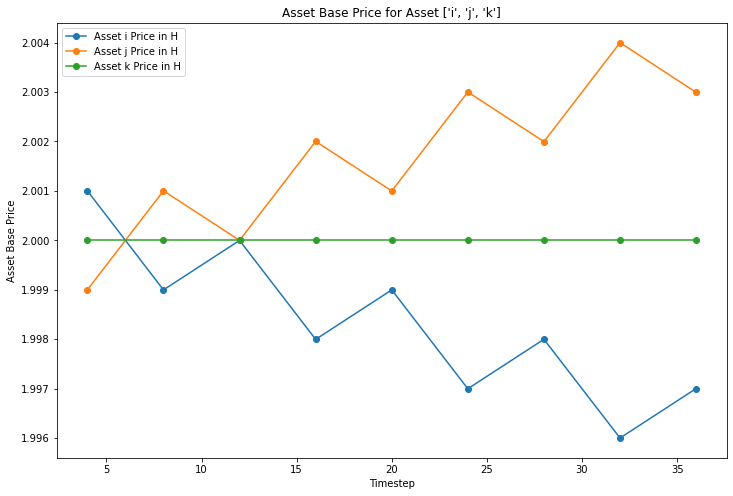

In [19]:
hydra_pool_price_plot(rdf,'Asset Base Price', rdf.last_valid_index(),['i', 'j','k'])

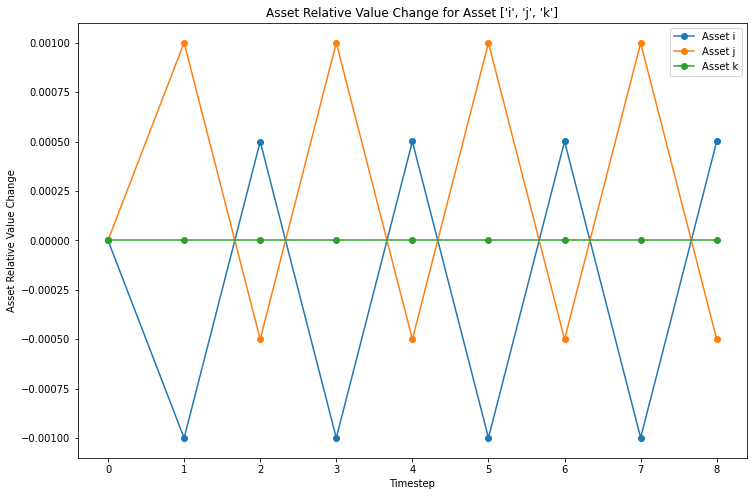

In [20]:
relative_value_plot(rdf,'Asset Relative Value Change', rdf.last_valid_index(),['i', 'j','k'])

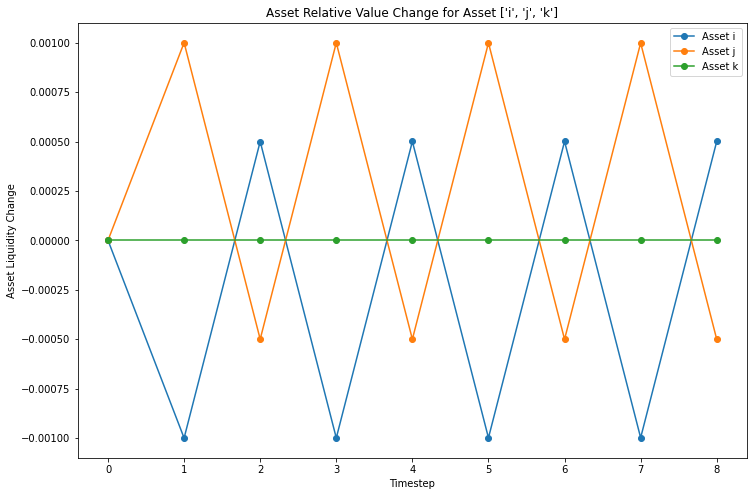

In [21]:
relative_liq_plot(rdf,'Asset Relative Value Change', rdf.last_valid_index(),['i', 'j','k'])

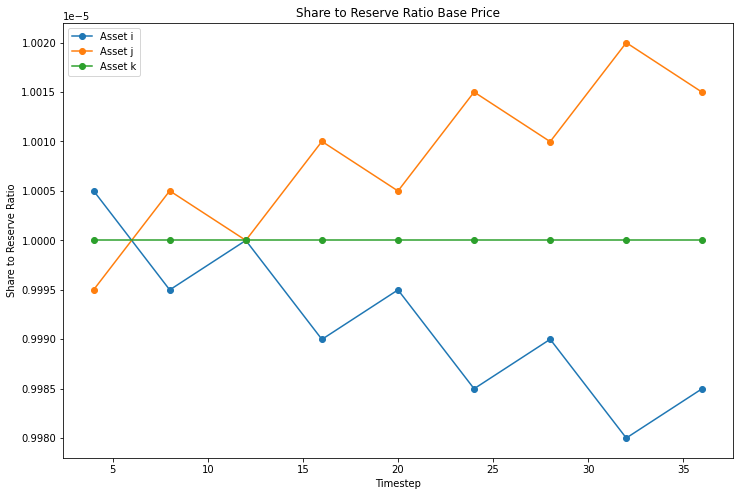

In [22]:
trade_liq_plot(rdf,'Share to Reserve Ratio Base Price', rdf.last_valid_index(),['i', 'j','k'])

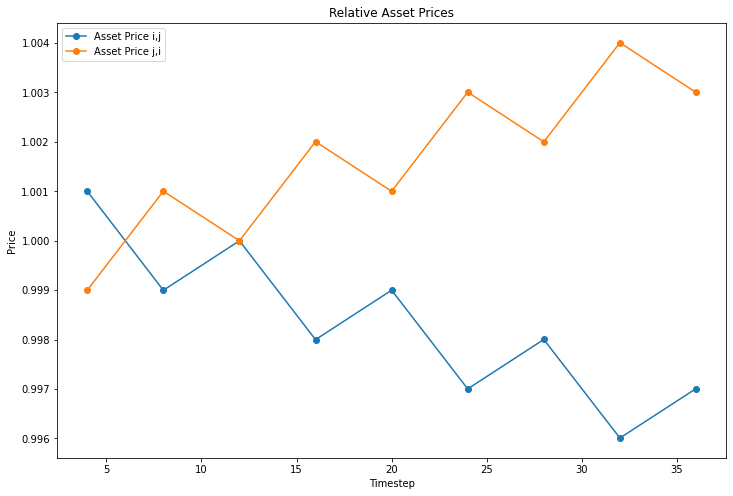

In [23]:
rel_price_plot(rdf,'Relative Asset Prices', rdf.last_valid_index(),['i', 'j'])

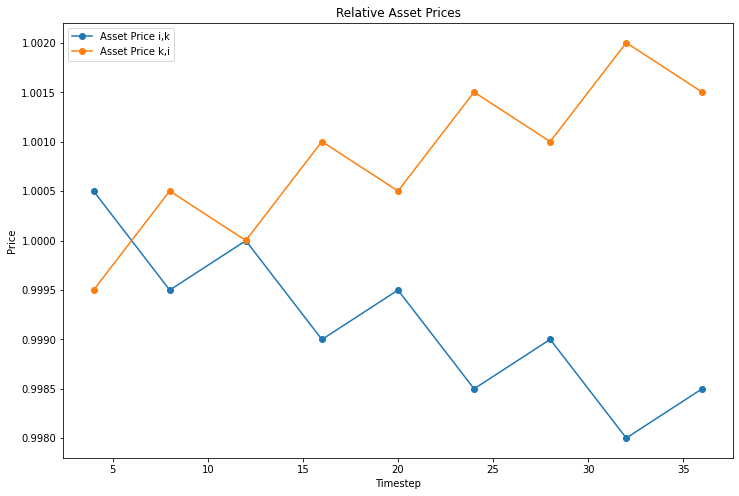

In [24]:
rel_price_plot(rdf,'Relative Asset Prices', rdf.last_valid_index(),['i', 'k'])

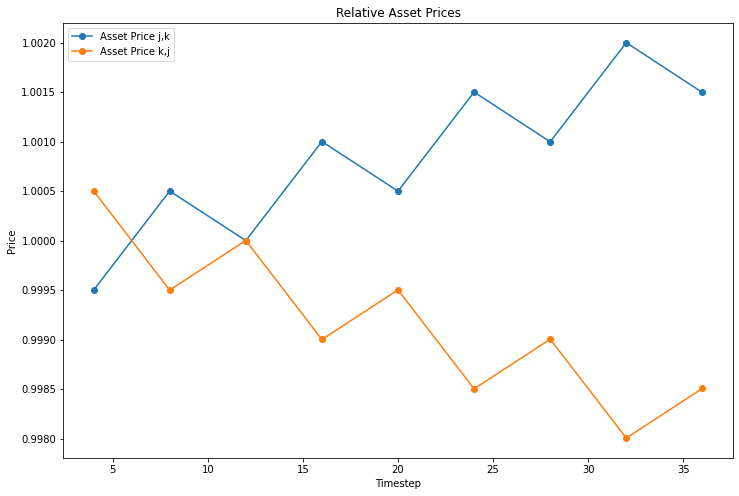

In [25]:
rel_price_plot(rdf,'Relative Asset Prices', rdf.last_valid_index(),['j', 'k'])

Only if we look much more closely can we see some deviation

In [26]:
rdf['hydra_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in          h      q_i           s_i  s_q    r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00       0.00   
1 1.00 999900.00     0.00   10000.00     0.00          0.00 0.00      99.00   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00  100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00       0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 1000000.00   
5 5.00     49.85     0.00  100000.00     0.00          0.00 0.00   99950.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  100000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00  100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [27]:
rdf['uni_agents'][rdf.first_valid_index()]

m   r_i_out   r_i_in          h      q_i           s_i  s_q    r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00       0.00   
1 1.00 999900.00     0.00   10000.00     0.00          0.00 0.00      99.00   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00  100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00       0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 1000000.00   
5 5.00     49.85     0.00  100000.00     0.00          0.00 0.00   99950.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  100000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00  100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [28]:
rdf['uni_agents'][rdf.first_valid_index()*2]

m   r_i_out   r_i_in          h      q_i           s_i  s_q    r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00       0.00   
1 1.00 999800.00     0.00   10000.00     0.00          0.00 0.00     198.80   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00  100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00       0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 1000000.00   
5 5.00     98.85     0.00  100000.00     0.00          0.00 0.00   99900.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  100000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00  100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

In [29]:
rdf['hydra_agents'][rdf.first_valid_index()*2]

m   r_i_out   r_i_in          h      q_i           s_i  s_q    r_j_out  \
0 0.00 100000.00     0.00  100000.00     0.00          0.00 0.00       0.00   
1 1.00 999800.00     0.00   10000.00     0.00          0.00 0.00     198.80   
2 2.00 100000.00     0.00  100000.00     0.00          0.00 0.00  100000.00   
3 3.00 100000.00 10000.00  100000.00 10000.00 1000000000.00 0.00       0.00   
4 4.00      0.00     0.00   10000.00     0.00          0.00 0.00 1000000.00   
5 5.00     98.85     0.00  100000.00     0.00          0.00 0.00   99900.00   
6 6.00      0.00     0.00 1000000.00     0.00          0.00 0.00  100000.00   
7 7.00      0.00     0.00  100000.00     0.00 1000000000.00 0.00  100000.00   

    r_j_in      q_j           s_j  
0     0.00     0.00          0.00  
1     0.00     0.00          0.00  
2     0.00     0.00          0.00  
3     0.00     0.00 1000000000.00  
4     0.00     0.00          0.00  
5     0.00     0.00          0.00  
6     0.00     0.00          0.00  
7 10000.00 10000.00 1000000000.00

## Conclusion

In this notebook, we have illustrated how to create a cadCAD model that takes in real data and replicates the mechanics of a real world smart contract extremely acurately by translating the smart contract code into python code. We enforce best practices for cadCAD modeling, and analyze our simulation data against the real data. 

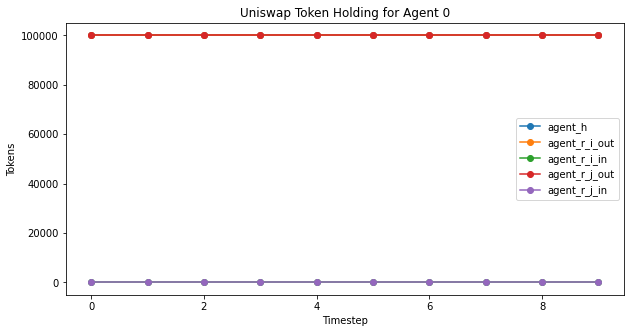

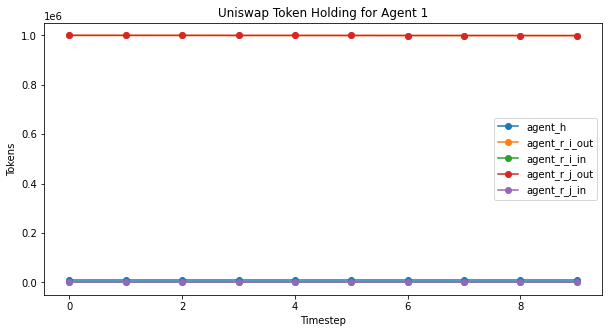

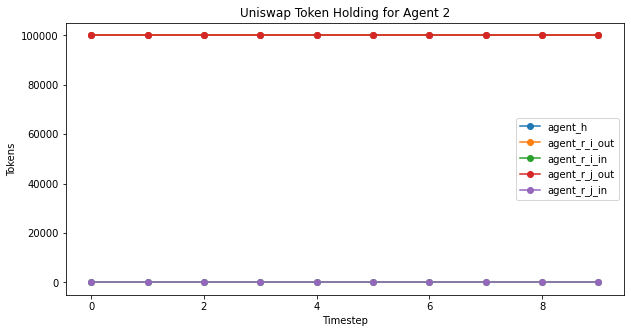

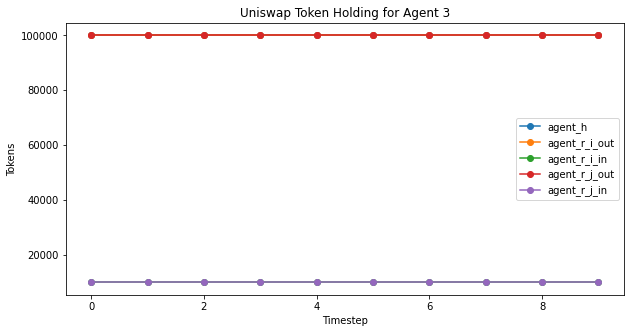

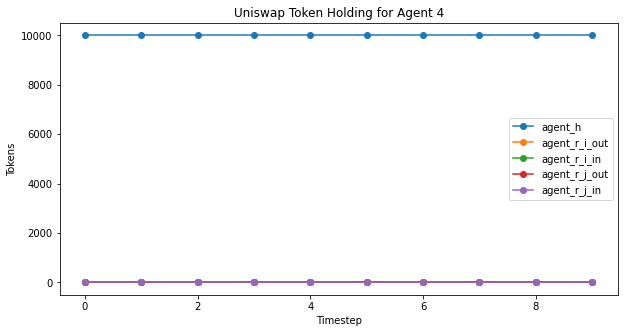

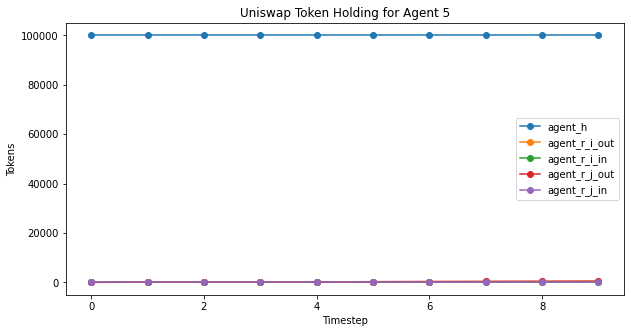

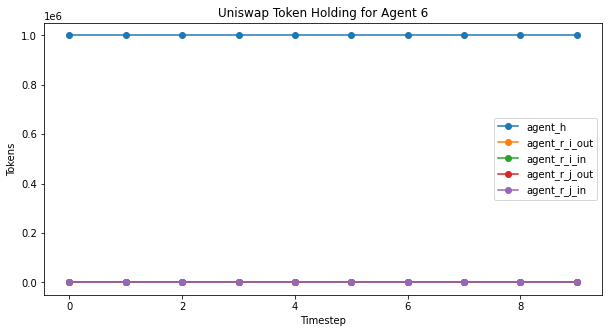

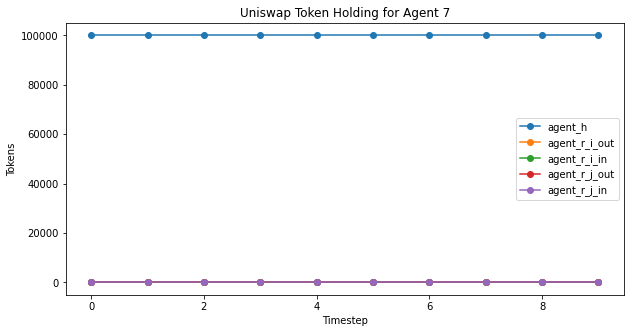

In [30]:
agent_plot(rdf,'Uniswap Token Holding for Agent ', len(rdf['timestep'])) #,4,'j')

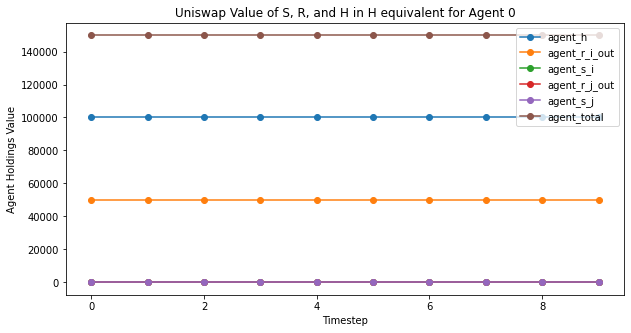

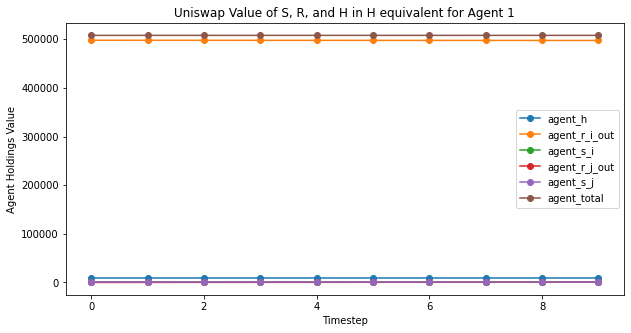

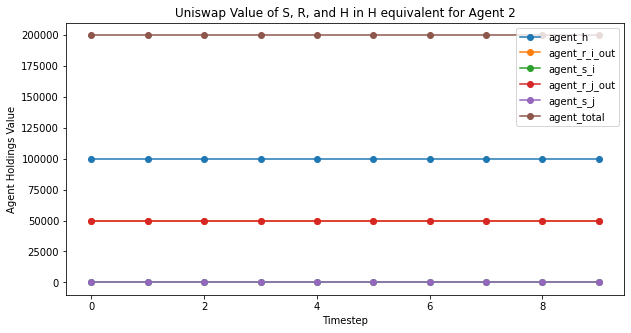

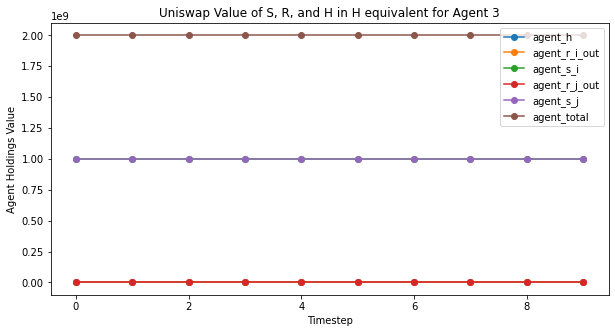

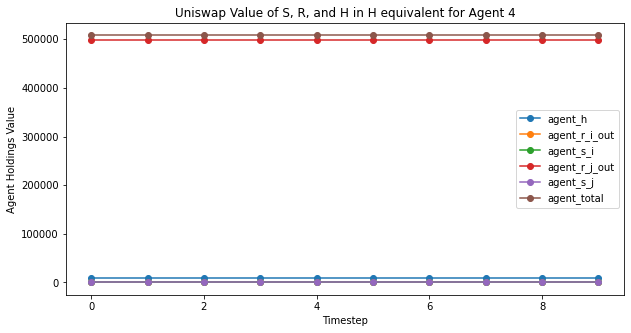

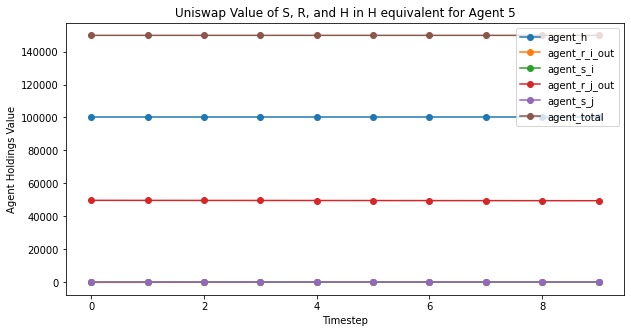

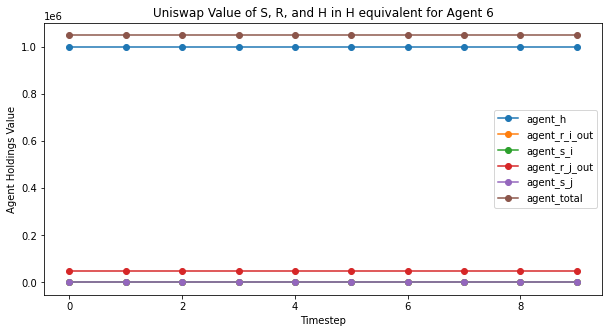

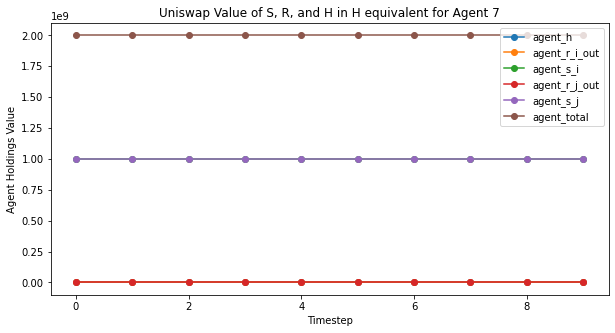

In [31]:
agent_value_plot(rdf,'Uniswap Value of S, R, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

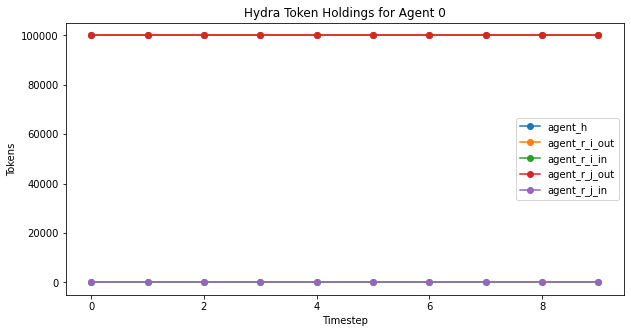

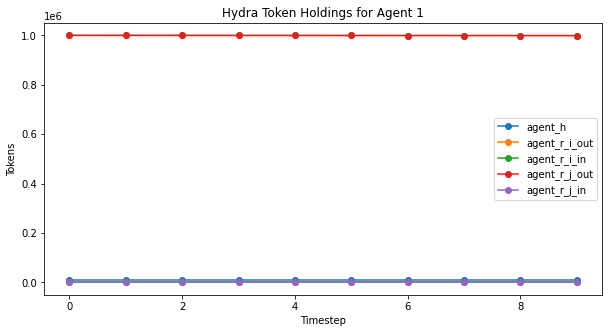

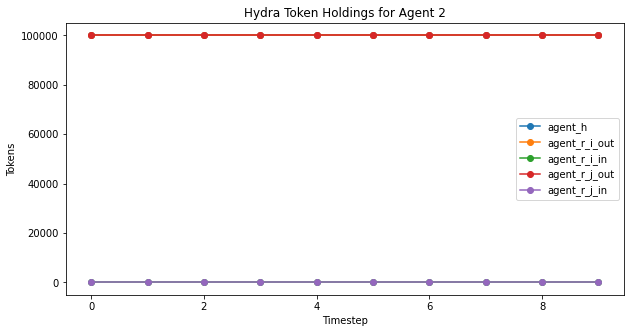

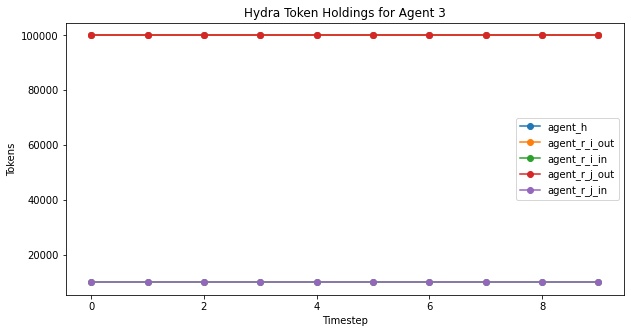

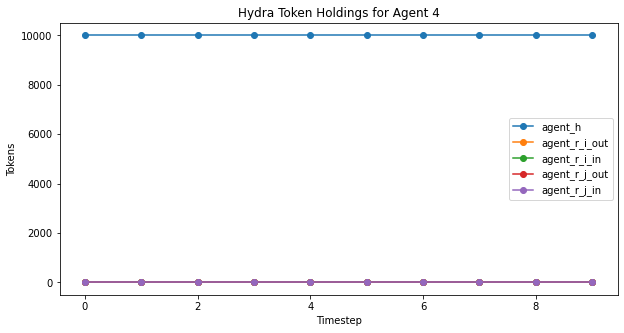

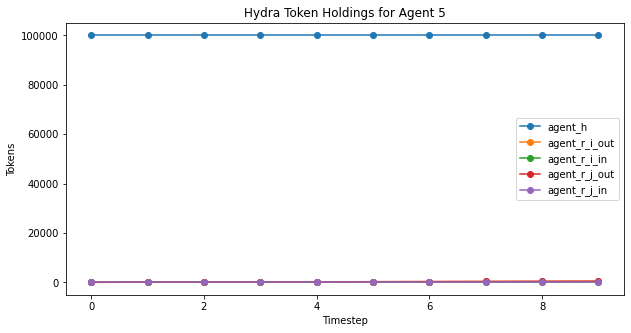

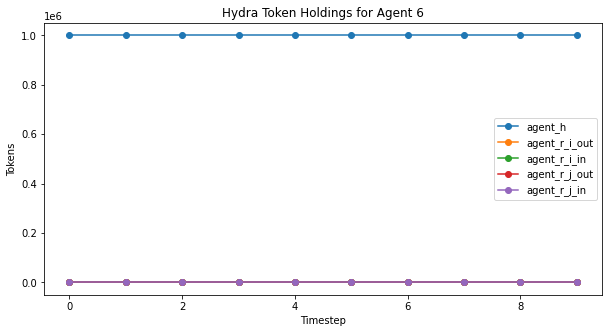

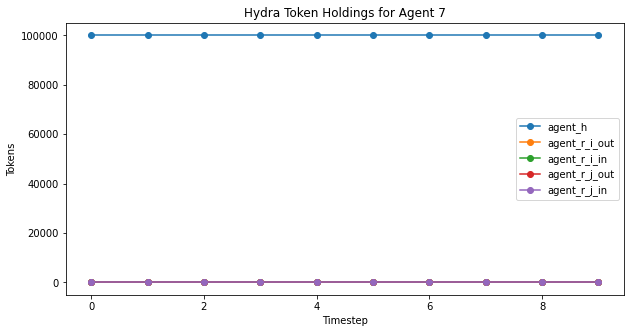

In [32]:
hydra_agent_plot(rdf,'Hydra Token Holdings for Agent ', len(rdf['timestep']))

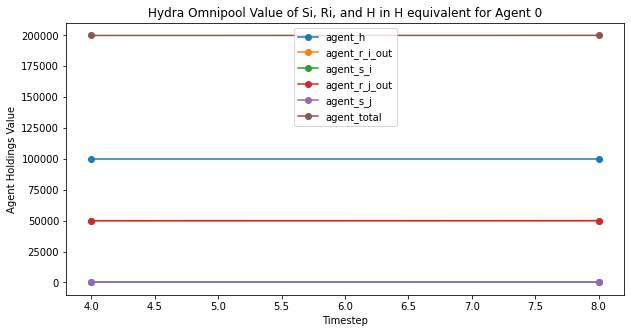

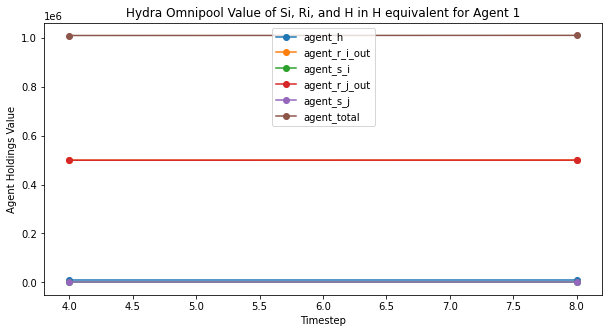

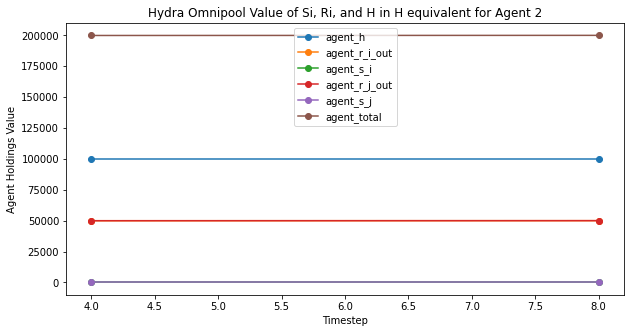

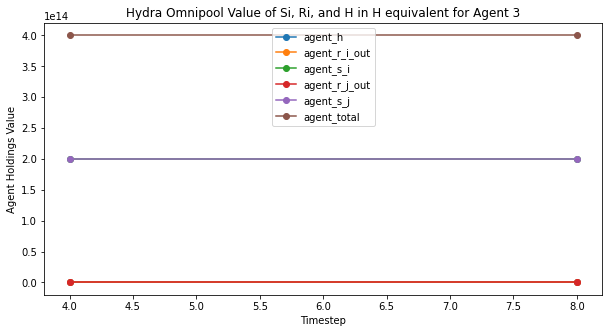

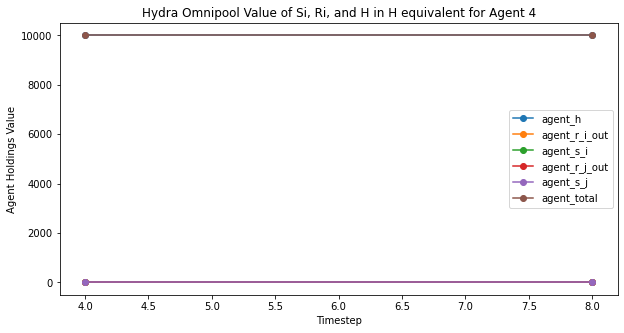

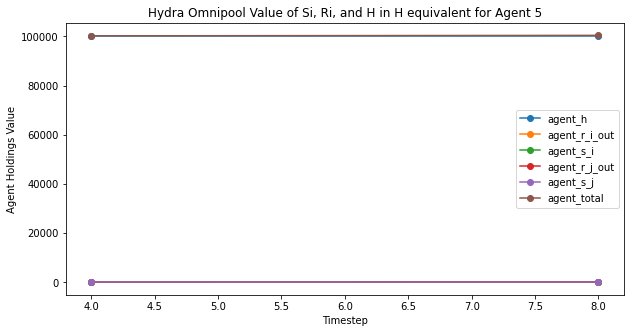

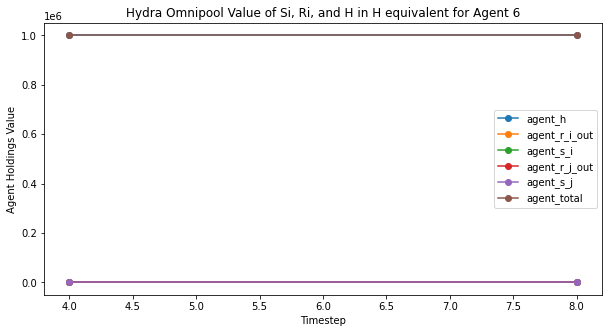

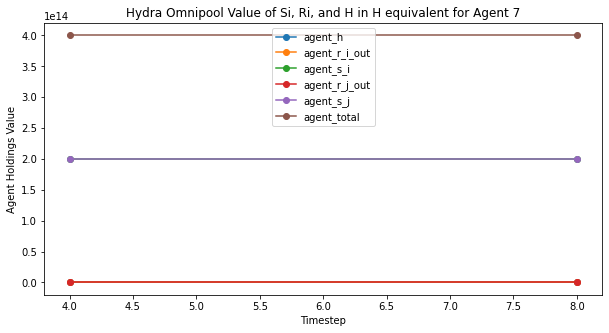

In [33]:
hydra_agent_value_plot(rdf,'Hydra Omnipool Value of Si, Ri, and H in H equivalent', len(rdf['timestep'])) #,2, 'i')

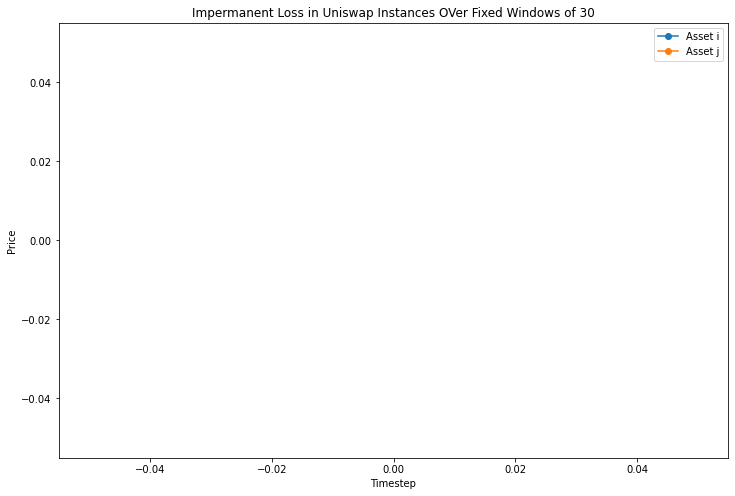

In [34]:
IL_plot(rdf,'Impermanent Loss in Uniswap Instances OVer Fixed Windows of ', 30)